<a href="https://colab.research.google.com/github/AdamAnderB/Bramlett_DSPN_S24/blob/main/book/exercises/linear-models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 7:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework datasets/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file.

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame.

In [ ]:
# If you are running this on your local computer, wet your workign directory to
# the location of the lexDat data by setting your harddrive. Uncomment this line
# and change the location to where it is on your computer.
#setwd("~/Documents/PittCMU/G3/DSPN/DataSciencePsychNeuro/Homeworks/hcp_data")

# If you are running this on Colab, then use something like this.
#system("gdown --id 1hywRmGdvhbDYTrQRyl1_bLJsq-T3GJq2")

# INSERT CODE HERE
url <- "https://raw.githubusercontent.com/CoAxLab/DataSciencePsychNeuro/master/Homework%20datasets/hcp_data/unrestricted_trimmed_1_7_2020_10_50_44.csv"
file <- "unrestricted_trimmed_1_7_2020_10_50_44.csv"
download.file(url, file)
d1<-read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")
library(tidyverse)
library(dplyr)
library(ggplot2)

d1<-d1%>%
  select(Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol)
head(d1)

,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
1,100004,M,121.97,NA,NA
2,100206,M,130.42,543134,807245
3,100307,F,112.56,407292,664124
4,100408,M,121.18,500417,726206
5,100610,M,126.53,512946,762308
6,101006,F,101.85,429449,579632


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

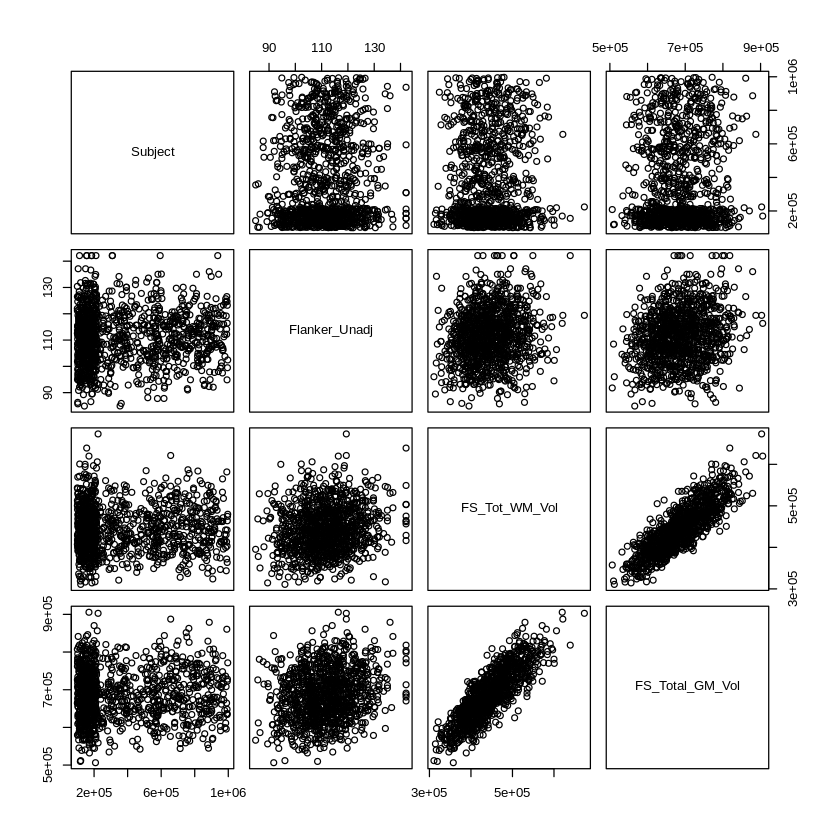

In [ ]:
#INSERT CODE HERE
d1_numeric<-d1%>%
  select(where(is.numeric))

pairs(d1_numeric, cex.labels = 1)

#total white matter volume (FS_Tot_WM_Vol) and total grey matter volume
#(FS_Total_GM_Vol) appear to be highly positively correlated. It seems that
#white matter volume and grey matter volumn have no correlation with scores on
# the flanker task. Additionally there doesn't seem to be a correlation between,
#subject and any of the other variables.

> *Write your response here.*
>

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [ ]:
#INSERT CODE HERE
simple_model<-lm(Flanker_Unadj~FS_Total_GM_Vol,data=d1)
summary(simple_model)

model_coef <- coef(simple_model)
print("Coefficients:")
print(model_coef)

# Calculate and print the 95% confidence intervals for the coefficients
model_confint <- confint(simple_model)
print("95% Confidence Intervals")
print(model_confint)



Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
  (93 observations deleted due to missingness)
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


[1] "Coefficients:"
    (Intercept) FS_Total_GM_Vol 
   9.025646e+01    3.109965e-05 
[1] "95% Confidence Intervals"
                       2.5 %       97.5 %
(Intercept)     8.428917e+01 9.622375e+01
FS_Total_GM_Vol 2.244198e-05 3.975733e-05


> *Write your response here.*
 the Coefficients for the model are:(Intercept)=9.025646e+01
   and FS_Total_GM_Vol=3.109965e-05.
the Confidence intervals for these coefficients are:we can be 95% sure that the Intercept falls between 8.428917e+01 and 9.622375e+01.
we can be 95% sure that the IFS_Total_GM_Vol falls between 2.244198e-05 and 3.975733e-05
.

> *italicized text*

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 93 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 93 rows containing missing values (`geom_point()`).”


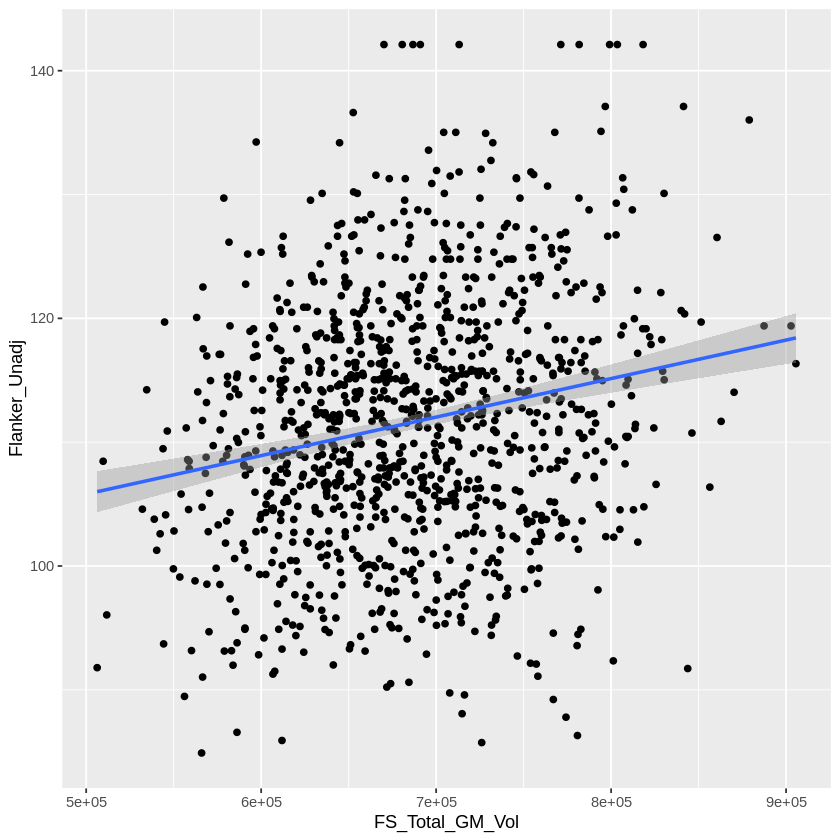

In [ ]:
#INSERT CODE HERE

d1%>%ggplot(aes(x=FS_Total_GM_Vol,y=Flanker_Unadj))+
  geom_point()+
  geom_smooth(method = "lm")

> *Write your response here.*
>

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?



```
# This is formatted as code
```

> *Write your response here.*
> From the model we can say that grey matter does indeed have a positive significant relationship with performance on the flanker task. Visual this is also apparent in the smoothing function. However, there is a ton of variability. That is, much of the variance in flanker scores is not explained by grey matter alone. We could possibly run more complex analyses to see if grey matter retains its predictive power when accounting for white matter, gender, and other variables.

**DUE:** 5pm EST, February 26, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*